In [1]:
#import necessary libraries,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
#load the cleaned dataset
df = pd.read_csv('./resources/heart_2022_no_nans.csv')


In [45]:
#shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
#view the first few rows
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...


In [47]:
# Print unique values of diabetes column
print("Unique values in Diabetes column:", df['HadDiabetes'].unique())

Unique values in Diabetes column: ['Yes' 'No' 'Yes, but only during pregnancy (female)'
 'No, pre-diabetes or borderline diabetes']


<Axes: xlabel='HadDiabetes', ylabel='count'>

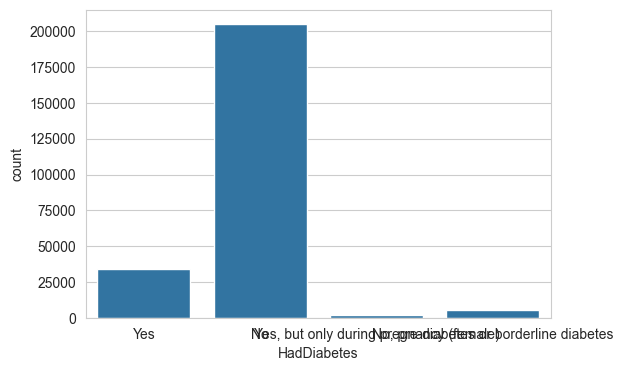

In [48]:
# Plot diabetes distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HadDiabetes')

In [5]:
#split the dataset into test and train sets into 80-20 ratio
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]
#view the shape of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (196817, 40)
Test set shape: (49205, 40)


In [8]:
# remove unnecessary columns
columns_to_remove = ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'ChestScan', 'DifficultyDressingBathing', 'DifficultyErrands', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear' , 'CovidPos']
train_df = train_df.drop(columns=columns_to_remove)
test_df = test_df.drop(columns=columns_to_remove)


In [9]:
# Print columns that have yes/no values
yes_no_columns = [col for col in train_df.columns if train_df[col].nunique() == 2 and set(train_df[col].unique()) == {'Yes', 'No'}]

print("Columns with Yes/No values:", yes_no_columns)

Columns with Yes/No values: ['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DifficultyWalking', 'AlcoholDrinkers']


In [41]:
from prep import preprocess_training_data, drop_unnecessary_columns

df = pd.read_csv('./resources/heart_2022_no_nans.csv')


In [42]:
df = drop_unnecessary_columns(df)

In [43]:
df = preprocess_training_data(df)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage',
       'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers'],
      dtype='object')
28


In [28]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'